## First step is to import libraries needed

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from random import randint

My pandas wasn't working so I had to install it again

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


## I want to scrape the website like I learned in Sandeep's class but I had trouble doing that plus it found no tables and I wasn't sure how to proceed.

In [6]:
response = requests.get('https://data.cityofnewyork.us/Business/NYC-Free-Tax-Prep-Sites/5kqf-fg3n/data')
soup = BeautifulSoup(response.text, 'html.parser')
page_text = soup.get_text()
print(page_text)


























































NYC Free Tax Prep Sites | NYC Open Data






Skip to main contentSkip to footer
















Sign In











Search


          Search
      







HomeDataAboutOverviewDashboardLaws and ReportsLearnHow ToJoin a ClassOpen Data WeekProject GalleryGlossaryFAQContact Us




            Menu
          




Menu

Close


HomeDataAboutOverviewDashboardLaws and ReportsLearnHow ToJoin a ClassOpen Data WeekProject GalleryGlossaryFAQContact Us

Sign In






Search























table



      NYC Free Tax Prep Sites
      
    
Based on 

        Based on NYC Free Tax Prep Sites

Publishing to the public requires approval

This dataset provides a machine-readable format for the data that populates the "NYC Free Tax Preparation Site Finder" map hosted on DCA's website.  The dataset includes the name and address of the service provider, its hours of operation, services available, and required geo-spacial data elements used 

I had to Google different options to extract the data from the table as I couldn't extract it by scraping and then I created a for loop.

In [8]:
json_url = 'https://data.cityofnewyork.us/resource/5kqf-fg3n.json'
response = requests.get(json_url)
if response.status_code == 200:
    tax_prep_sites_df = pd.DataFrame(response.json())
    print(tax_prep_sites_df.head())
else:
    print("Failed to retrieve data.")

       sitekey sitestatus                 providername  \
0       UU - 1     Active  Food Bank For New York City   
1     PREP-QNS     Active     NYC Free Tax Prep-A-Thon   
2  AARPMN - 15     Active                AARP Tax Aide   
3      GB - 11     Active  Food Bank For New York City   
4   FBNYC - 20     Active  Food Bank For New York City   

                                         sitename building             street  \
0                             Jesus Is The Answer    89-17       139th Street   
1                                          Queens    35-01       Union Street   
2                                  Kennedy Center       34  West 134th Street   
3  Bed-Stuy Campaingn against Hunger Far Rockaway     2010      Fulton Street   
4                   NYCHA Grand Street Settlement      400        Hart Street   

     borough      city                                mappedaddress  \
0     Queens   Jamaica       "89-17 139th Street, Queens NY, 11435"   
1     Queens  Flushing

In [9]:
print(tax_prep_sites_df.head())

       sitekey sitestatus                 providername  \
0       UU - 1     Active  Food Bank For New York City   
1     PREP-QNS     Active     NYC Free Tax Prep-A-Thon   
2  AARPMN - 15     Active                AARP Tax Aide   
3      GB - 11     Active  Food Bank For New York City   
4   FBNYC - 20     Active  Food Bank For New York City   

                                         sitename building             street  \
0                             Jesus Is The Answer    89-17       139th Street   
1                                          Queens    35-01       Union Street   
2                                  Kennedy Center       34  West 134th Street   
3  Bed-Stuy Campaingn against Hunger Far Rockaway     2010      Fulton Street   
4                   NYCHA Grand Street Settlement      400        Hart Street   

     borough      city                                mappedaddress  \
0     Queens   Jamaica       "89-17 139th Street, Queens NY, 11435"   
1     Queens  Flushing

For loop was successful

In [11]:
print(tax_prep_sites_df.columns)

Index(['sitekey', 'sitestatus', 'providername', 'sitename', 'building',
       'street', 'borough', 'city', 'mappedaddress', 'phone', 'show311',
       'showonmap', 'website', 'incomelimit', 'l1', 'itin', 's1',
       'amendedreturn', 'prioryear', 'aarp', 'selfemployed', 'opendatestr',
       'opendateiso', 'closedatestr', 'closedateiso', 'apptorwalkin',
       'tuesdayopen', 'ituesdayopen', 'tuesdayclose', 'ituesdayclose',
       'thursdayopen', 'ithursdayopen', 'thursdayclose', 'ithursdayclose',
       'saturdayopen', 'isaturdayopen', 'saturdayclose', 'isaturdayclose',
       'ianydayopen', 'ianydayclose', 'citycouncildistrict',
       'communitydistrict', 'bbl', 'nta', 'xcoordinate', 'ycoordinate',
       'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih', 'unit', 'fridayopen', 'ifridayopen',
       'fridayclose', 'if

In [12]:
tax_prep_sites_df

,sitekey,sitestatus,providername,sitename,building,street,borough,city,mappedaddress,phone,...,wednesdayopen,iwednesdayopen,wednesdayclose,iwednesdayclose,sundayopen,isundayopen,sundayclose,isundayclose,scheduleexceptions,extension
0,UU - 1,Active,Food Bank For New York City,Jesus Is The Answer,89-17,139th Street,Queens,Jamaica,"""89-17 139th Street, Queens NY, 11435""",(718) 908-6303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PREP-QNS,Active,NYC Free Tax Prep-A-Thon,Queens,35-01,Union Street,Queens,Flushing,"""35-01 Union Street, Queens NY, 11354""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AARPMN - 15,Active,AARP Tax Aide,Kennedy Center,34,West 134th Street,Manhattan,NaN,"""34 West 134th Street, Manhattan NY, 10037""",(212) 862-6401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GB - 11,Active,Food Bank For New York City,Bed-Stuy Campaingn against Hunger Far Rockaway,2010,Fulton Street,Brooklyn,NaN,"""2014 Fulton Street, Brooklyn NY, 11233""",(718) 773-3551,...,9:00 AM,9,5:00 PM,17,NaN,NaN,NaN,NaN,NaN,NaN
4,FBNYC - 20,Active,Food Bank For New York City,NYCHA Grand Street Settlement,400,Hart Street,Brooklyn,NaN,"""400 Hart Street, Brooklyn NY, 11206""",(718) 919-5623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,FBNYC - 34,Active,Food Bank For New York City,ResCare Youth Pathways,630,Flushing Avenue,Brooklyn,NaN,"""628 Flushing Avenue, Brooklyn NY, 11206""",(718) 619-4197,...,9:00 AM,9,5:00 PM,17,NaN,NaN,NaN,NaN,NaN,NaN
180,AARPMN - 19,Active,AARP Tax Aide,Parkchester Library,1985,Westchester Avenue,Bronx,NaN,"""1987 Westchester Avenue, Bronx NY, 10462""",(718) 829-7830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed 2/1/19 - Presidents' Day,NaN
181,FBNYC - 70,Active,Urban Upbound,East NY HHC,2094,Pitkin Avenue,Brooklyn,NaN,"""2094 Pitkin Avenue, Brooklyn NY, 11207""",(718) 784-0877,...,11:00 AM,11,7:00 PM,19,NaN,NaN,NaN,NaN,NaN,7
182,ARIVA - 6,Active,Ariva,Workforce Housing,1380,University Avenue,Bronx,NaN,"""1382 University Avenue , Bronx NY, 10453""",(646) 564-3799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analizing the data

I wanted to see how many sites are per borough

In [15]:
borough_counts = tax_prep_sites_df['borough'].value_counts()
print(borough_counts)

borough
Brooklyn         51
Manhattan        50
Bronx            49
Queens           28
Staten Island     5
Woodside          1
Name: count, dtype: int64


How many sites are active and unactive

In [17]:
status = tax_prep_sites_df['sitestatus'].value_counts()
print(status)

sitestatus
Active      182
Inactive      2
Name: count, dtype: int64


Who are the main providers? and the least common providers.

In [19]:
main_providers = tax_prep_sites_df['providername'].value_counts().head(5)
print(main_providers)

providername
Food Bank For New York City    82
AARP Tax Aide                  33
Ariva                          22
Urban Upbound                  20
Grow Brooklyn                  10
Name: count, dtype: int64


In [20]:
uncommon_providers = tax_prep_sites_df['providername'].value_counts().tail(5)
print(uncommon_providers)

providername
NYC Free Tax Prep-A-Thon    4
Commonpoint Queens          2
Chhaya CDC                  2
Nazareth Housing Inc.       2
The Bronx NHS               1
Name: count, dtype: int64


## Plotting the data!!!

In [22]:
import geopandas as gpd

In [23]:
!pip install matplotlib

In [24]:
import matplotlib.pyplot as plt

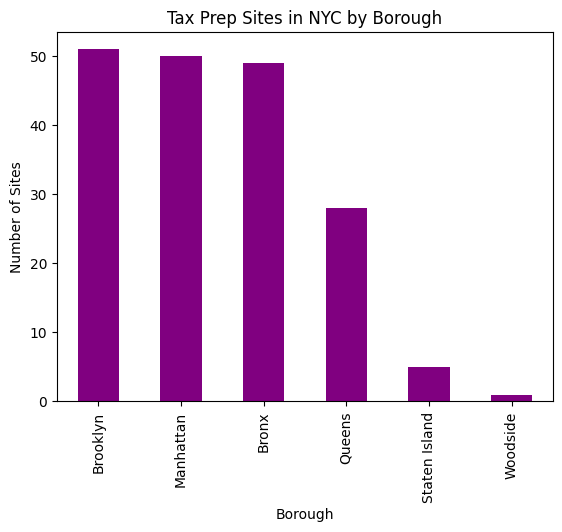

In [87]:
borough_counts.plot(kind='bar', color='purple', title="Tax Prep Sites in NYC by Borough")
plt.xlabel('Borough')
plt.ylabel('Number of Sites')
plt.xticks(rotation=90)

save_path = r'output'  
os.makedirs(save_path, exist_ok=True)


plt.savefig(os.path.join(save_path, 'tax_prep_sites.png'), dpi=300)


plt.show()

